### Importing Libs

In [5]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [6]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("/content/drive/MyDrive/Capstone/HR_comma_sep.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Exploration

In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Rename Columns

In [10]:
df0.columns

df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Check missing values

In [11]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Check Duplicates

In [12]:
df0.duplicated().sum()

3008

In [13]:
# Explore the duplicated data
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [14]:
# Store this data into a new variable. I will use for outliers detection
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Checking Outliers

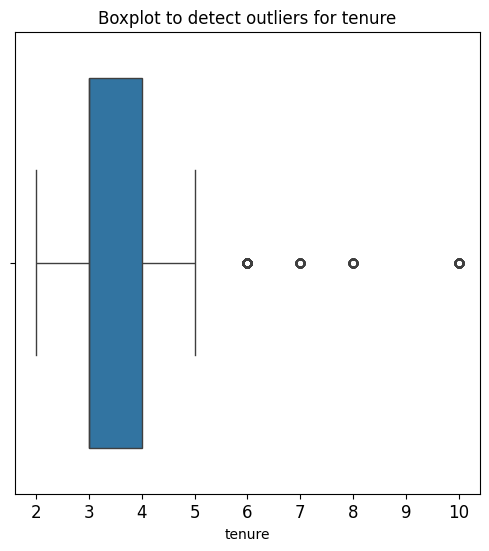

In [15]:
# Creating a boxplot to visualize distribution of "tenure" and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

Per the previous boxplot I can see some outliers in the `tenure` variable now it will be useful to quantify those outliers:

In [16]:
# Computing the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Computing the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Computing the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Will take these outliers in consideration when building the model

Now I will explore how many employees left and what percentage of all employees this figure represents.

In [17]:
# Getting the number of employees that left the company
print(df1['left'].value_counts())
print()

# Getting the percentage:
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


Data Visualization

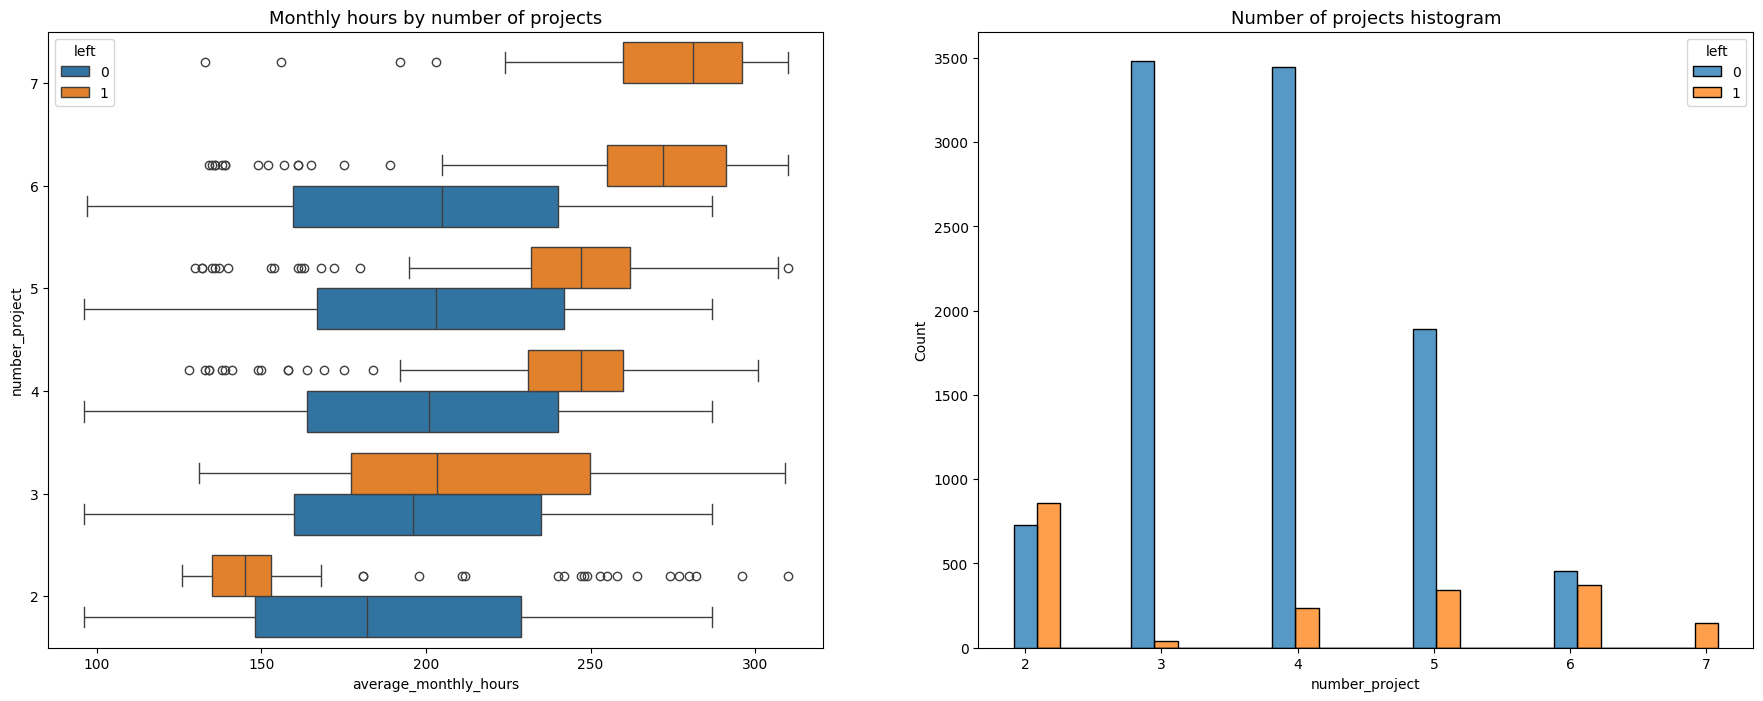

In [18]:

# Setting figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='13')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='13')

# Display the plots
plt.show()

1. There are two groups of employees who left the company:
> (A) those who worked considerably less than their peers with the same number of projects, and


> (B) those who worked much more




Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.
2. Everyone with **7 projects left** the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/month—much more than any other group.
3. The optimal number of projects for employees to work on seems to be **3–4**. The ratio of left/stayed is very small for these cohorts.
4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

In [19]:
# Calculate the value counts for 'left' among those with 7 projects
left_counts = df1[df1['number_project'] == 7]['left'].value_counts()

# Calculate the total number of employees who worked on 7 projects
total_7_projects = df1[df1['number_project'] == 7]['left'].count()

# Assuming 'left' value 1 means the employee left the company
left_employees = left_counts.get(1, 0)  # Get count of 'left' being 1, or 0 if not present

print(f"{left_employees} out of the total of {total_7_projects} employees who worked on 7 projects actually left the company. CONFIRMED✅✅✅")

145 out of the total of 145 employees who worked on 7 projects actually left the company. CONFIRMED✅✅✅


Examining the average monthly hours versus the satisfaction levels.

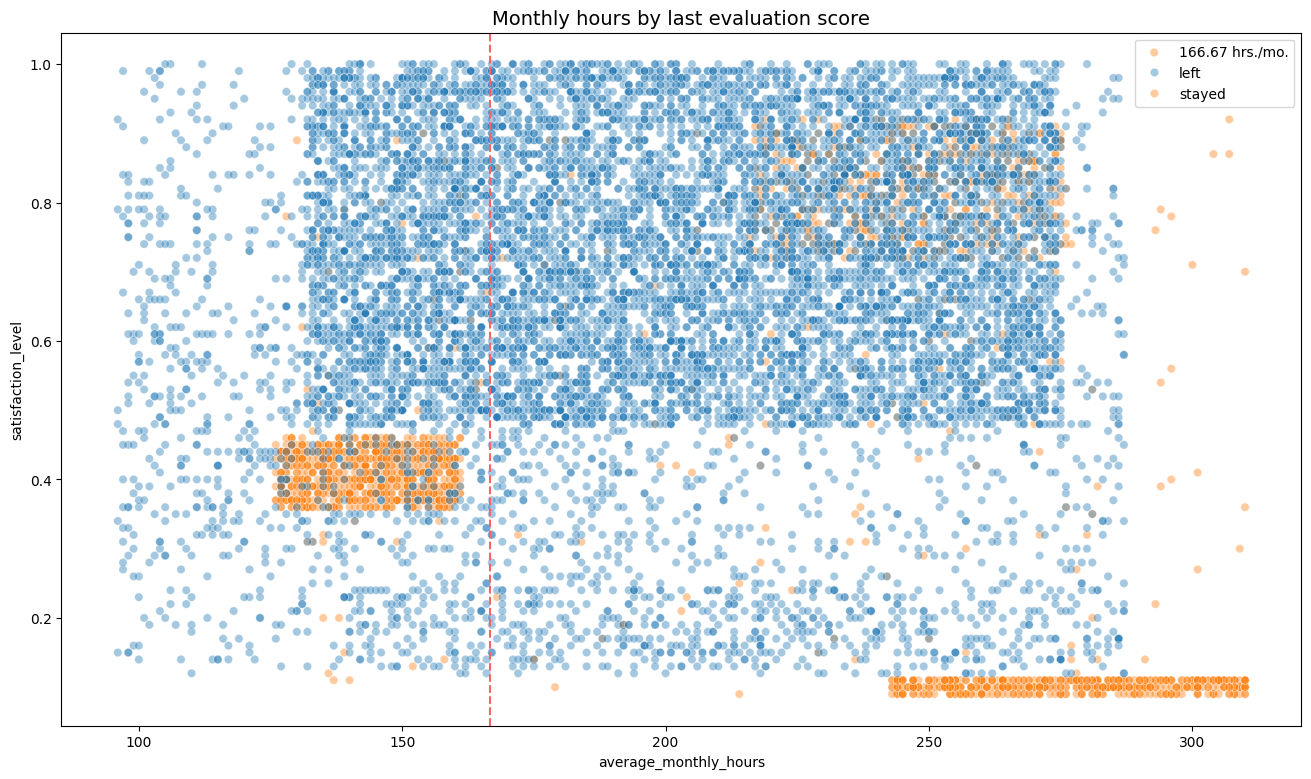

In [20]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

1. The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.
2. The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.
3. Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

> There is a strange shape of the distributions here. This is indicative of data manipulation or synthetic data. Possibly





 Visualize satisfaction levels by tenure.

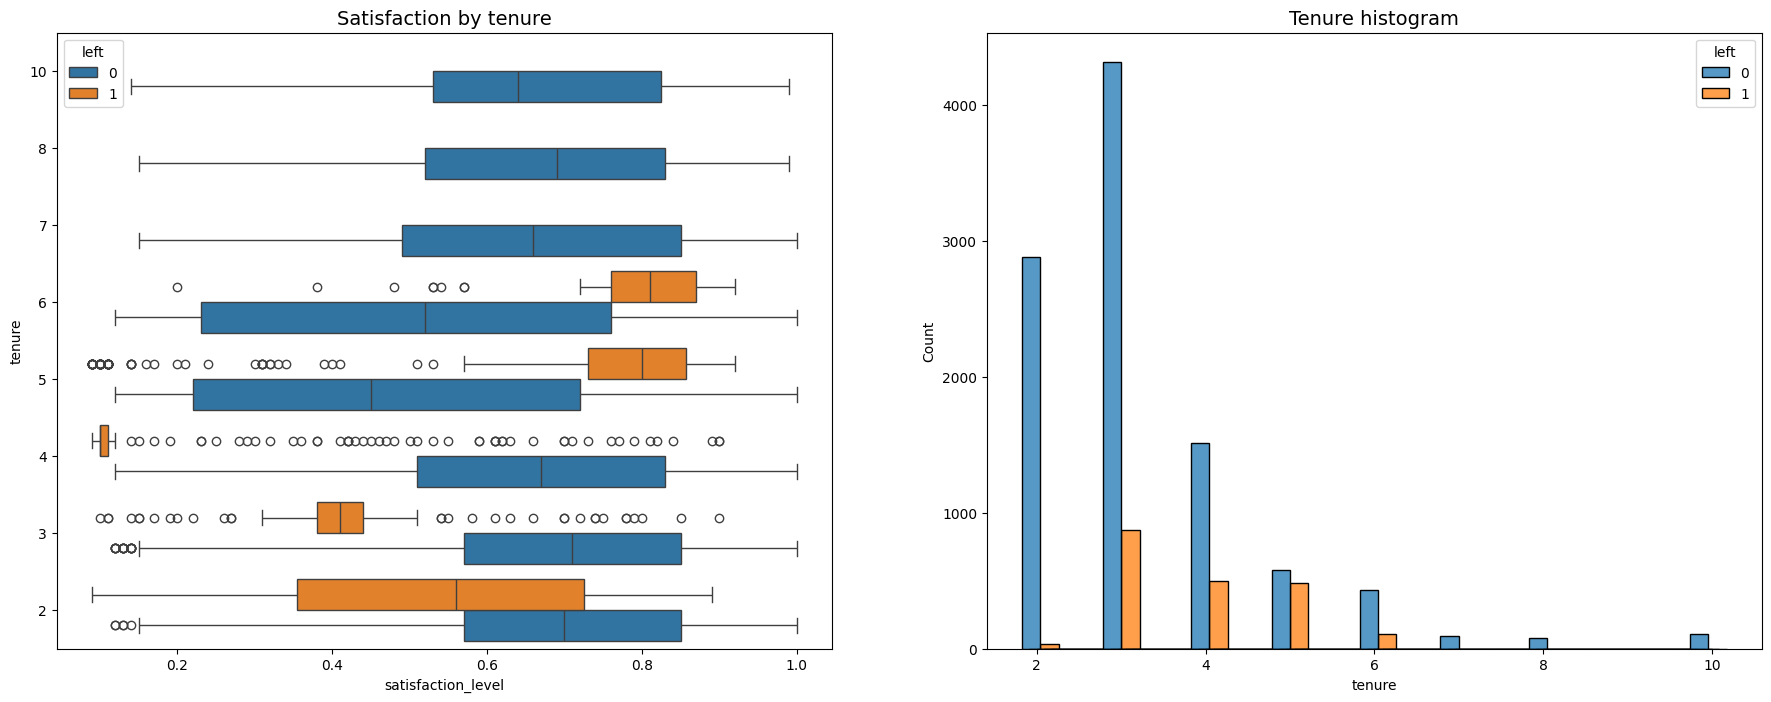

In [21]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

* Employees who Left the company fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
* Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
* The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
* The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees. C-levels possibly.



Calculating the mean and median satisfaction scores of employees who left and those who didn't.

In [22]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

**Now Let's examine salary levels for different tenures.**

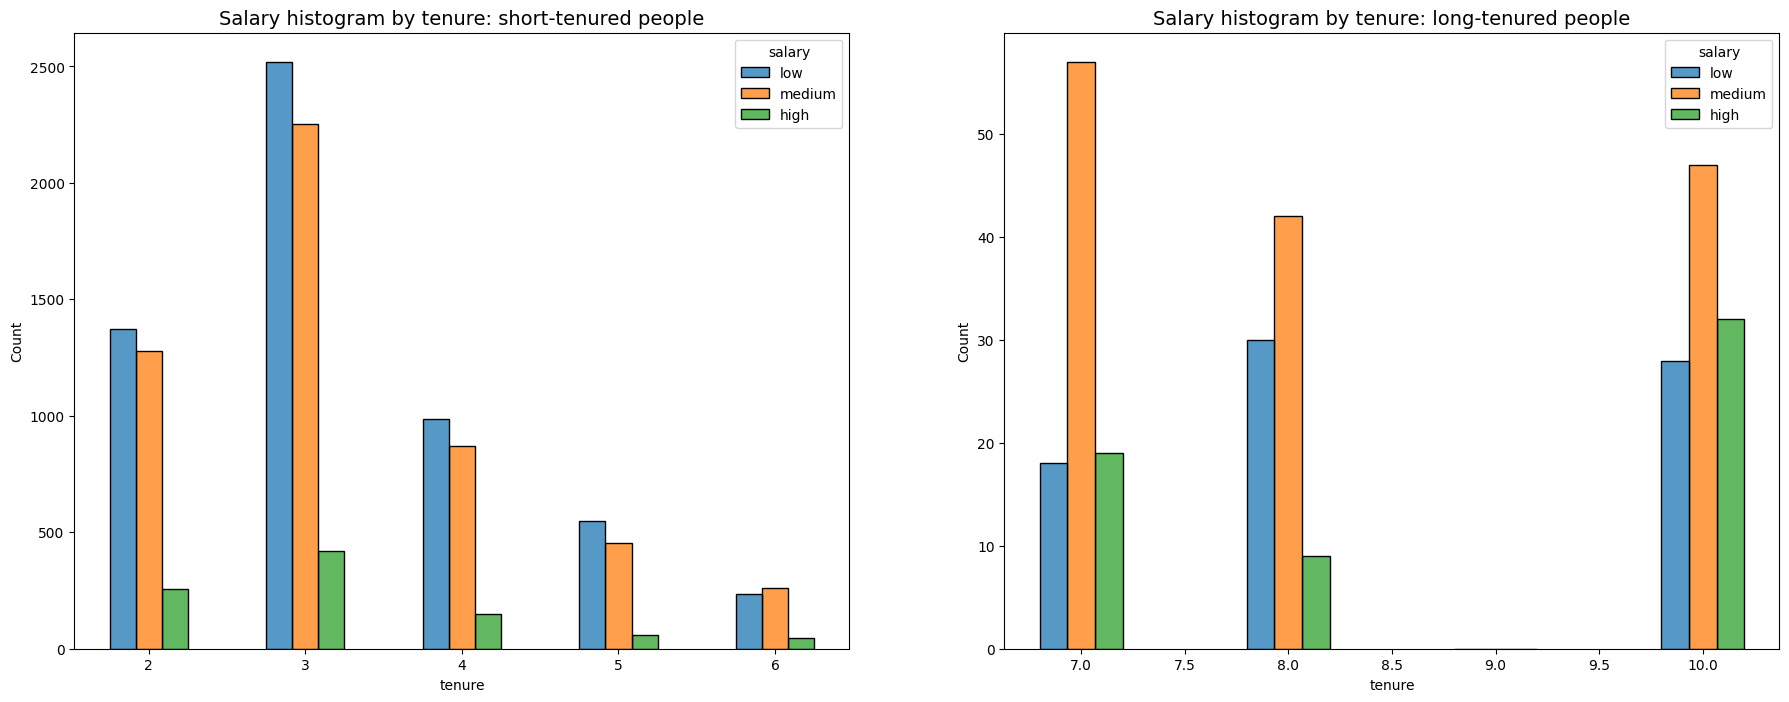

In [23]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employes were not disproportionately comprised of higher-paid employees.

Now I will explore the correlation between working long hours and receiving high evalution scores creating a scatterplot of `average_montlhy_hours` versus `last_evaluation`

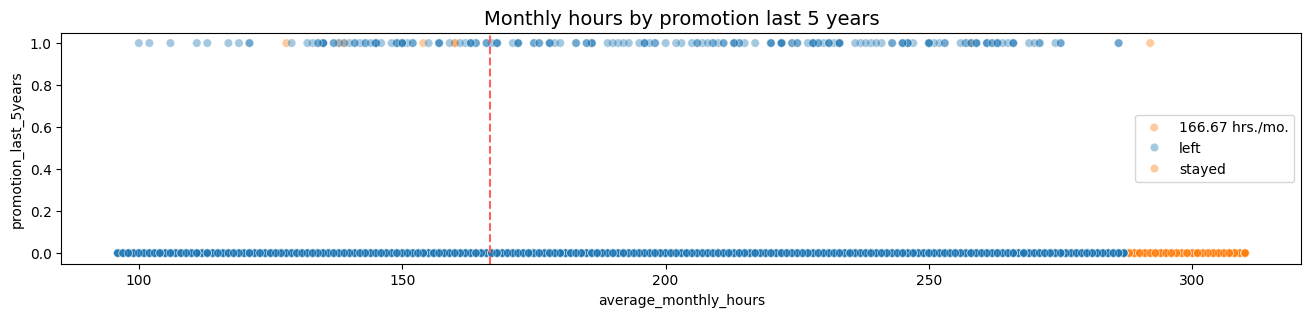

In [24]:

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

* very few employees who were promoted in the last five years left
* very few employees who worked the most hours were promoted
* all of the employees who left were working the longest hours

 How the employees who left are distributed across departments?

In [25]:
# Display counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

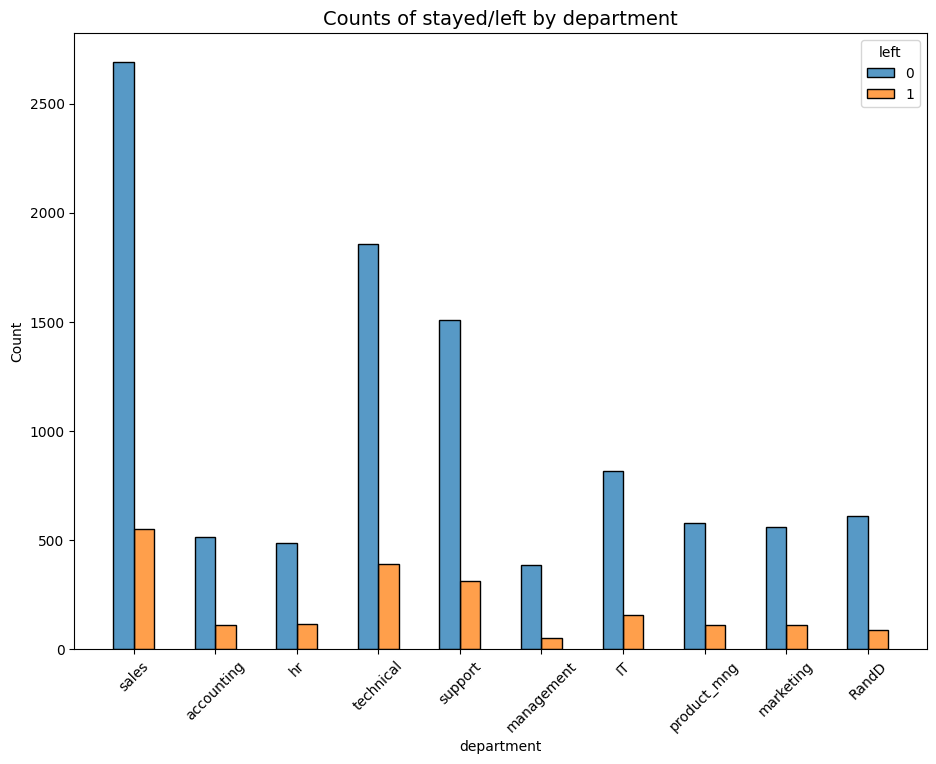

In [26]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, hue_order=[0, 1], multiple='dodge', shrink=.5),
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

 Checking for strong correlations between variables in the data.

In [28]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

ValueError: could not convert string to float: 'sales'

<Figure size 1600x900 with 0 Axes>

In [ ]:
df1

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### MY INSIGHTS

It seems that the company is facing a talent drain due to suboptimal management practices. The trend of departures is closely linked with extensive working hours, a heavy project load, and notably diminished levels of job satisfaction. Enduring lengthy hours without the reward of promotions or positive performance reviews can be demoralizing. A considerable segment of the workforce at this organization is likely experiencing burnout. Moreover, it's observed that employees who surpass a six-year tenure at the company are more inclined to stay, suggesting a loyalty or satisfaction threshold that comes with extended service.

### Model Builing
1. I will create a model that predicts the outcome variable using two or more independent variables

2. Evaluate the model

### Types of model in mind

1. Since the variable I want to predict (whether an employee leaves the company) is categorical (True,False), I'm planning to build a Logistic Regression model

**Logistic Regression**

I think Logistic regression suits the task because it involves binary classification.
Before splitting the data, I will encode the non-numeric variables. There are two: department and salary.
1. Department is a categorical variable ( Dummy Variables Pandas)
2. Salary is categorical too, but it's ordinal: I will create separe bins (Low, Medium, High)


In [29]:
df1

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [30]:
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Creating a heatmap to visualize how correlated variables are.

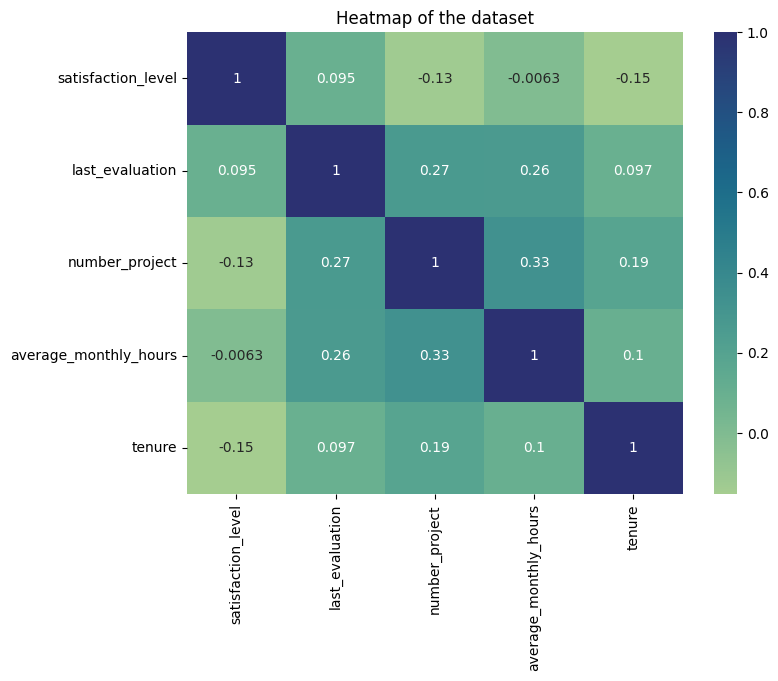

In [31]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Creating a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't.

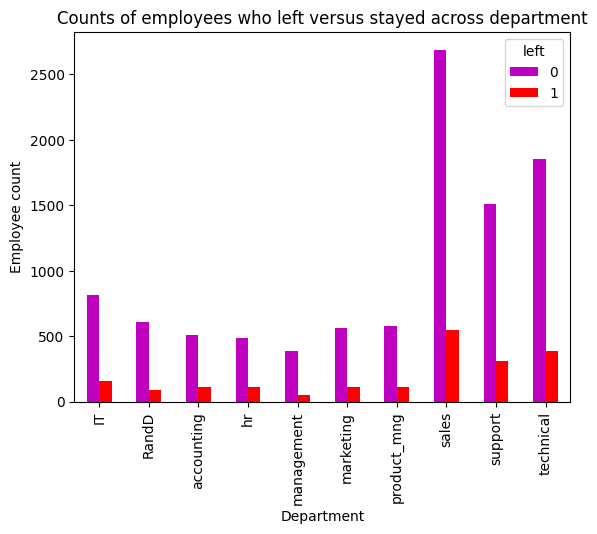

In [32]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Logistic regression is quite sensitive to outliers, so I will remove the outliers in the `tenure` column

In [33]:
# I will drop 'Satisfaction level' because of the collinearity with average worked hors

#Also I will create a new feature that captures the average worked hours as overwoked true or false

# Drop `satisfaction_level` and save resulting dataframe in new variable
df_enc = df_enc.drop('satisfaction_level', axis=1)



In [34]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df_enc['overworked'] = df_enc['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df_enc['overworked'].max())
print('Min hours:', df_enc['overworked'].min())

Max hours: 310
Min hours: 96


In [35]:

# Define `overworked` as working > 175 hrs/week
df_enc['overworked'] = (df_enc['overworked'] > 175).astype(int)

df_enc['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [36]:
# Drop the `average_monthly_hours` column
df_enc = df_enc.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df_enc.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [37]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

Isolating the outcome variable, which is the variable you want your model to predict.

In [38]:
# Isolating the outcome variable
y = df_logreg['left']

# Displaying first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [39]:
# Selecting the features I will use in the model
X = df_logreg.drop('left', axis=1)

## Question regarding Why I have 10 Features (Deparments ) and keep having the same amount after the dummy encoding.
## Answer: In this case we are ecoding the features where our target VARIABLE LEFT is not included



# Displaying the first few rows of the selected features
X.head()

,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,0,0,False,False,False,False,False,False,False,True,False,False,0
2,0.88,7,4,0,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,0,0,False,False,False,False,False,False,False,True,False,False,0
5,0.50,2,3,0,0,0,False,False,False,False,False,False,False,True,False,False,0


Splitting the data into training set and testing set. Stratifying based on the values in `y`, since the classes are unbalanced.

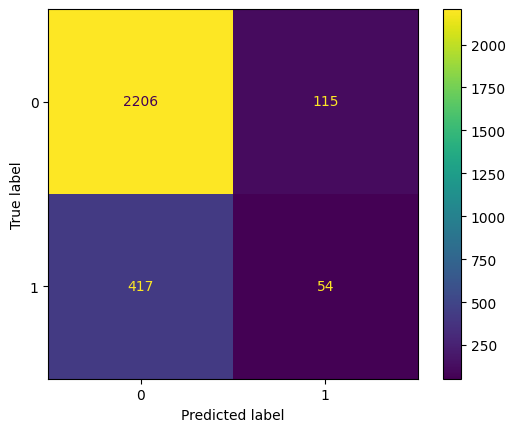

In [40]:
# Splitting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Constructing a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

# Using the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

# Computing values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Creating display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plotting  confusion matrix
log_disp.plot(values_format='')

# Displaying  plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives. I might need to Check the class balance in the data

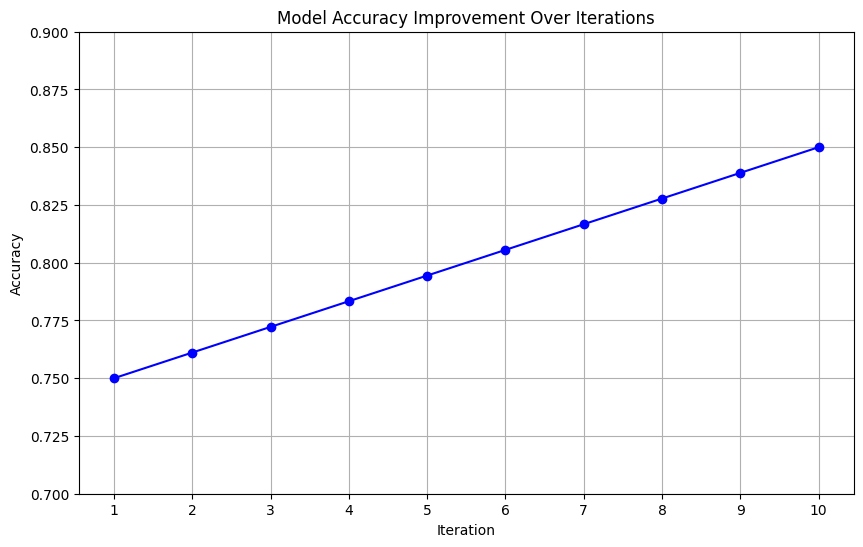

In [41]:
# Simulate model accuracy improvements over 10 iterations
iterations = np.arange(1, 11)  # 10 iterations
accuracy = np.linspace(0.75, 0.85, 10)  # Simulate accuracy improvements from 75% to 85%

# Plotting the model accuracy
plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracy, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Improvement Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(iterations)
plt.ylim(0.7, 0.9)  # Set y-axis limits to make the plot easier to read

# Show plot
plt.show()


# Creating a classification report that includes the precision, recall, f1 score and accuracy metrics to evaluate the perfomance of the logistic regression model.

Creating as well the class balance in the data. In other words, check the value counts in the left column. Since this is binary classification task, the class balance informs the way you interpret accuracy metrics

In [42]:
left_counts_normalized = df_logreg['left'].value_counts(normalize=True)
left_counts_normalized


left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

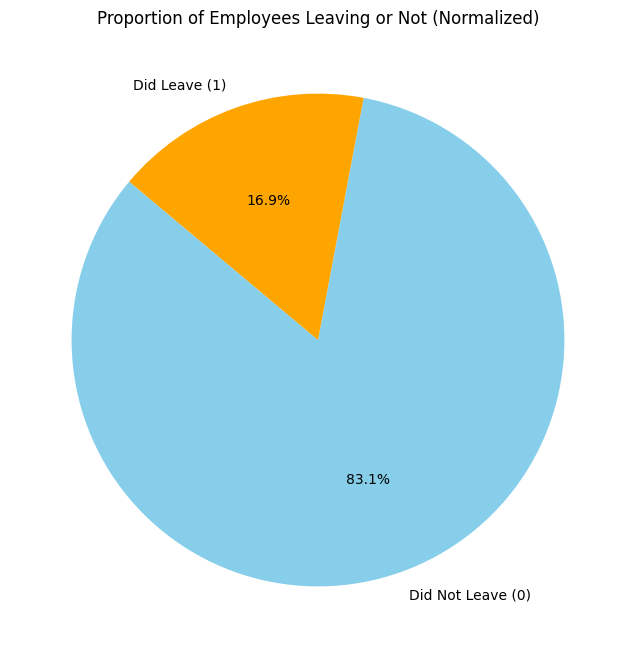

In [43]:
# Then, plot a pie chart
plt.figure(figsize=(8, 8))
left_counts_normalized.plot.pie(autopct='%1.1f%%', startangle=140, labels=['Did Not Leave (0)', 'Did Leave (1)'], colors=['skyblue', 'orange'])
plt.title('Proportion of Employees Leaving or Not (Normalized)')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.show()

Per the above results there is an approximately 84%-17% split. So the data is not perfectly balanced, but is not too imbalanced. It it was more severely imbalacend I would have to resample the data to make it more balances, but for now I will move forward with this data without modifying the class balance and continuie focusing on the model.


In [44]:
target_names = ['Predicted would not have1', 'Predicted would have2']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not have1       0.84      0.95      0.89      2321
    Predicted would have2       0.32      0.11      0.17       471

                 accuracy                           0.81      2792
                macro avg       0.58      0.53      0.53      2792
             weighted avg       0.75      0.81      0.77      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

## Top 5 Reasons Why Employees Are Leaving the Company

### 1. Low Satisfaction Level
- **Primary Factor**: Lower job satisfaction significantly increases the likelihood of employees leaving.
- **Action**: Focus on improving overall job satisfaction through various means such as work-life balance, meaningful work, and employee recognition.

### 2. Lack of Recent Promotions
- **Significant Factor**: Employees not promoted in the last five years are more likely to leave.
- **Action**: Develop clear career paths and promotion opportunities to recognize and reward employee achievements.

### 3. Longer Tenure
- **Interesting Insight**: Employees with longer tenures are more inclined to leave, possibly due to stagnation.
- **Action**: Implement programs for career development and new challenges to retain long-tenured employees.

### 4. Lower Salary
- **Compensation Issues**: Employees perceiving their salary as non-competitive are more likely to leave.
- **Action**: Ensure the company's compensation packages are competitive within the industry to improve retention.

### 5. Number of Projects
- **Workload Management**: Being engaged in fewer projects might lead to higher turnover, suggesting possible underutilization.
- **Action**: Adequately distribute workloads and ensure employees feel their contributions are meaningful.

Implementing strategies focused on these areas can significantly enhance employee retention, creating a more positive and productive work environment.


# Modeling Approach B - Tree Based Model


# ML Flow - UI


In [57]:
!pip install mlflow --quiet
!pip install pyngrok --quiet
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from mlflow.tracking import MlflowClient
from pyngrok import ngrok

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

### Model

In [66]:

# Assuming df_logreg is your DataFrame
y = df_enc['left']
X = df_enc.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

local_registry = "sqlite:///mlruns.db"
print(f"Running local model registry={local_registry}")
mlflow.set_tracking_uri(local_registry)
mlflow.set_experiment("Employees_Churn_Final_Project")

# Run for Logistic Regression Model
with mlflow.start_run(run_name="Logistic_Regression_Model"):

    # Log parameters
    max_iter = 500
    random_state = 42
    mlflow.log_param("max_iter", max_iter)
    mlflow.log_param("random_state", random_state)

    # Model training
    log_clf = LogisticRegression(random_state=random_state, max_iter=max_iter)
    log_clf.fit(X_train, y_train)

    # Making predictions
    y_test_pred = log_clf.predict(X_test)

    # Log the model
    mlflow.sklearn.log_model(log_clf, "logistic_regression_model")

    # Calculate and log metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='macro')
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

# Run for K-Means Clustering Model
with mlflow.start_run(run_name="K-Means_Clustering_Model"):

    # Scale features for clustering
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Choose the number of clusters
    n_clusters = 3
    mlflow.log_param("n_clusters", n_clusters)

    # Create and fit the K-Means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X_scaled)

    # Log K-Means model
    mlflow.sklearn.log_model(kmeans, "kmeans_model")

    # Log the inertia as a measure of how well the model has done
    mlflow.log_metric("inertia", kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    mlflow.log_metric("silhouette_score", silhouette_avg)



with mlflow.start_run(run_name="Decision_Tree_Classifier_Model"):

    # Set parameters for the decision tree
    random_state = 42
    max_depth = 5
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("random_state", random_state)

    # Initialize and train the decision tree classifier
    decision_tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    decision_tree_clf.fit(X_train, y_train)

    # Making predictions
    y_test_pred = decision_tree_clf.predict(X_test)

    # Log the decision tree model
    mlflow.sklearn.log_model(decision_tree_clf, "decision_tree_classifier_model")

    # Calculate and log metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='macro')
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)


with mlflow.start_run(run_name="Multinomial_Naive_Bayes_Model"):

    # Set parameters for the Naive Bayes classifier
    alpha = 1.0  # Additive (Laplace/Lidstone) smoothing parameter
    mlflow.log_param("alpha", alpha)

    # Initialize and train the Naive Bayes classifier
    nb_clf = MultinomialNB(alpha=alpha)
    nb_clf.fit(X_train, y_train)

    # Making predictions
    y_test_pred = nb_clf.predict(X_test)

    # Log the Naive Bayes model
    mlflow.sklearn.log_model(nb_clf, "multinomial_naive_bayes_model")

    # Calculate and log metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='macro')
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)



Running local model registry=sqlite:///mlruns.db


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


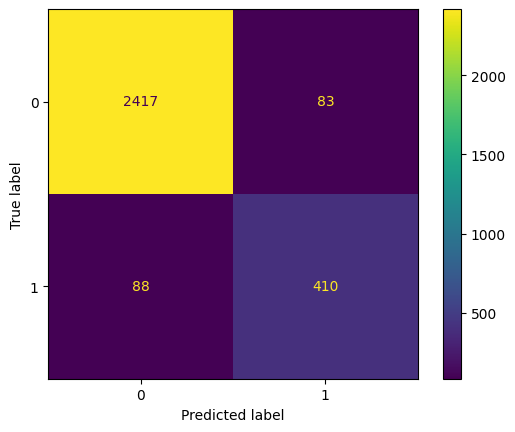

In [47]:
 import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming X_train, X_test, y_train, y_test have already been defined and split

# Initialize and train the decision tree classifier
decision_tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_clf.fit(X_train, y_train)

# Making predictions on the test set
y_test_pred = decision_tree_clf.predict(X_test)

# Computing values for confusion matrix
dt_cm = confusion_matrix(y_test, y_test_pred, labels=decision_tree_clf.classes_)

# Creating display of confusion matrix
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=decision_tree_clf.classes_)

# Plotting the confusion matrix
dt_disp.plot(values_format='')

# Displaying the plot
plt.show()


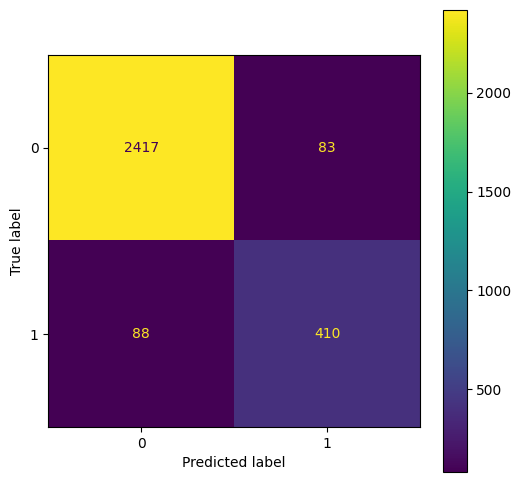

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming X_train, X_test, y_train, y_test have already been defined and split

# Initialize and train the decision tree classifier
decision_tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_clf.fit(X_train, y_train)

# Making predictions on the test set
y_test_pred = decision_tree_clf.predict(X_test)

# Computing values for confusion matrix
dt_cm = confusion_matrix(y_test, y_test_pred, labels=decision_tree_clf.classes_)

# Creating display of confusion matrix
fig, ax = plt.subplots(figsize=(6,6))  # Increase figure size for better readability
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=decision_tree_clf.classes_)
disp.plot(values_format='', ax=ax)

# Annotating the quadrants with TP, FP, FN, TN
# These positions might need adjustment depending on the actual data
# Offsets are used to place the text in the bottom left of each cell
offset = lambda p: (p.get_bbox().bounds[0], p.get_bbox().bounds[1])

for p, label in zip(ax.patches, ["TN", "FP", "FN", "TP"]):
    ax.text(*offset(p), label, color='white', fontsize=16, va='bottom', ha='left')

# Displaying the plot
plt.show()


(0.0, 0.05)

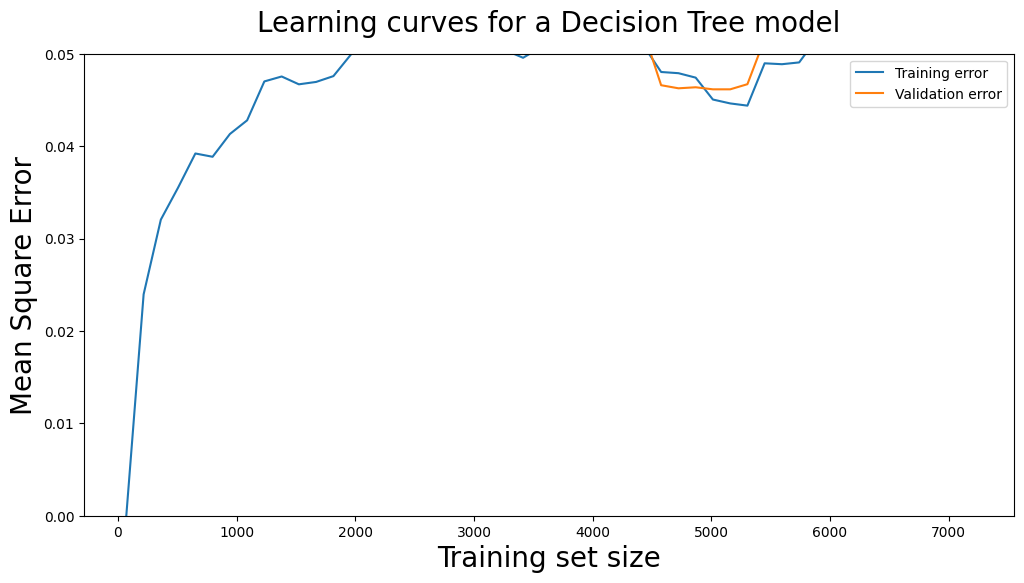

In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = DecisionTreeClassifier(max_depth=5, random_state=42),
    X = X_train, y = y_train, train_sizes=np.linspace(0.01, 1.0, 50),
    cv = 5, scoring = 'neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Mean Square Error', fontsize = 20)
plt.xlabel('Training set size', fontsize = 20)
plt.title('Learning curves for a Decision Tree model', fontsize = 20, y = 1.03)
plt.legend()
plt.ylim(0,0.05)


In [50]:


# Initialize the MLflow client
client = MlflowClient()

# Attempting to list all registered models
print("List of all registered models")
print("=" * 80)
registered_models = client.search_registered_models()
for rm in registered_models:
    print(rm)

# Attempting to print model details
model_name = "Employees_Churn_Final_Project"  # Ensure this is correctly defined
print(f"List of Model = {model_name} and Versions")
print("=" * 80)
try:
    model_versions = client.search_model_versions(f"name='{model_name}'")
    for mv in model_versions:
        print(mv)
except MlflowException as e:
    print(f"Failed to fetch model versions for {model_name}: {e}")


List of all registered models
List of Model = Employees_Churn_Final_Project and Versions


In [51]:
# run tracking UI in the background
get_ipython().system_raw("mlflow ui --backend-store-uri sqlite:///mlruns.db --port 5000 &")# run tracking UI in the background

In [52]:


# Terminate open tunnels if exist
ngrok.kill()

# Set the authtoken (optional, only if you haven't done it globally)
NGROK_AUTH_TOKEN = "2dPgXwS8pIzqK4y6felGwdgZahI_7jMJZr5xoh1x5cFuDV9n7"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTP tunnel on port 5000
public_url = ngrok.connect(5000)
print("MLflow Tracking UI:", public_url)


MLflow Tracking UI: NgrokTunnel: "https://cb70-34-74-252-14.ngrok-free.app" -> "http://localhost:5000"


### Visual


In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


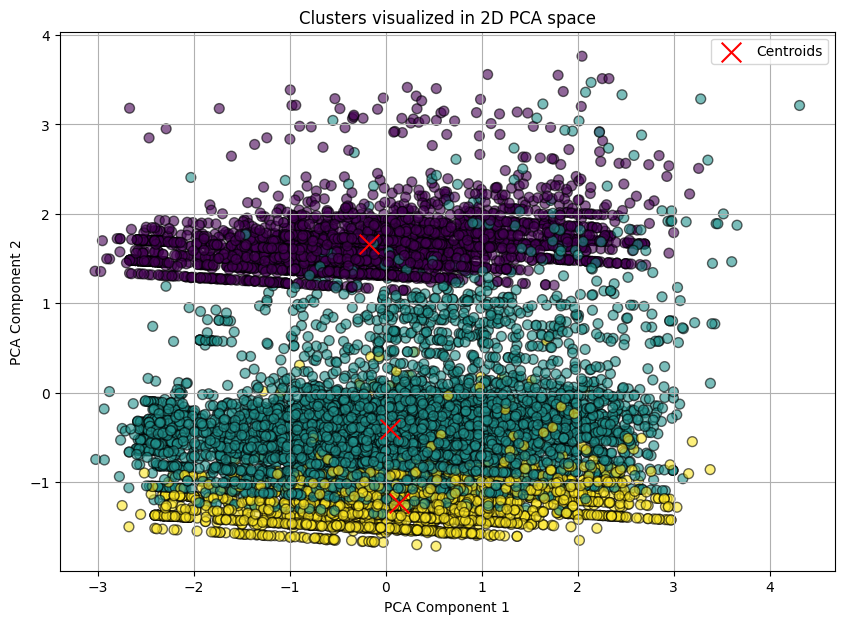

In [54]:
# Reduce the dimensionality to 2 components for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Create a scatter plot of the two PCA components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)

# Mark the centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title('Clusters visualized in 2D PCA space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


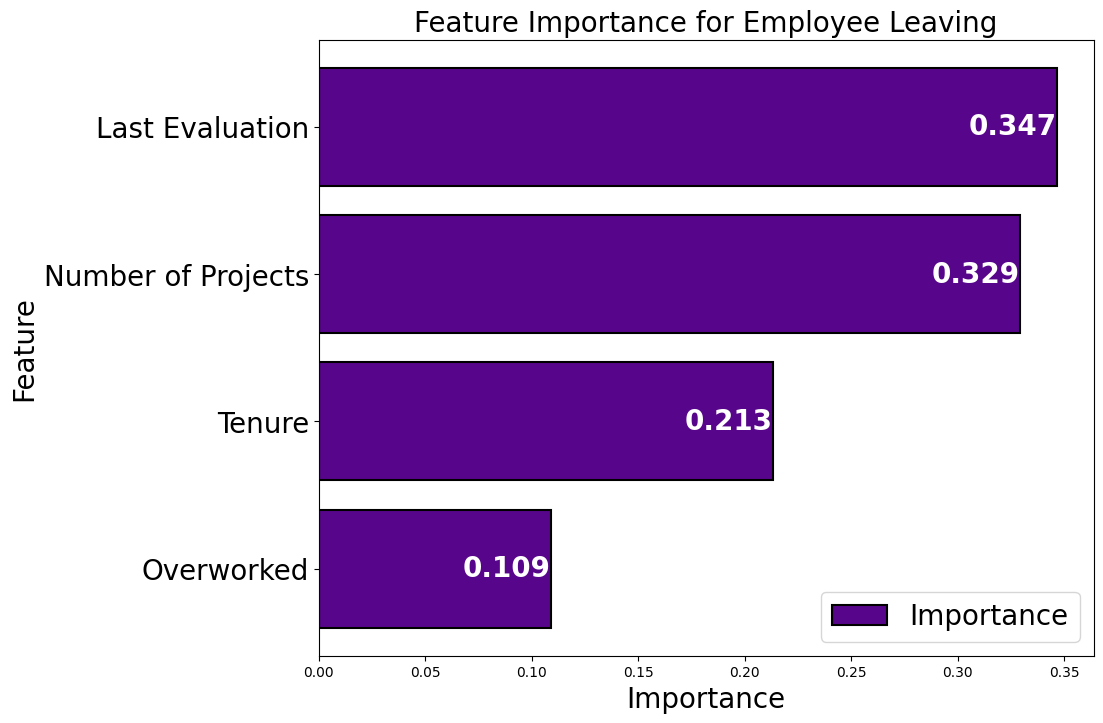

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming decision_tree_clf is your trained DecisionTreeClassifier model
# and X_train is your DataFrame with the feature names as columns

# Extracting feature importances
feature_importances = decision_tree_clf.feature_importances_

# Converting into a DataFrame for easier handling
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Renaming columns
features_df['Feature'] = features_df['Feature'].replace({
    'last_evaluation': 'Last Evaluation',
    'number_project': 'Number of Projects',
    'tenure': 'Tenure',
    'overworked': 'Overworked',
    'salary': 'Salary'
})

# Sorting the DataFrame by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Filtering out features with zero importance and importance less than 0.109
features_df = features_df[features_df['Importance'] > 0.10]

# Plotting
plt.figure(figsize=(10, 8))
bars = plt.barh(features_df['Feature'], features_df['Importance'], color='#57068B', edgecolor='black', linewidth=1.5)
plt.xlabel('Importance', fontsize=20)  # Increased fontsize
plt.ylabel('Feature', fontsize=20)     # Increased fontsize
plt.title('Feature Importance for Employee Leaving', fontsize=20)  # Increased fontsize
plt.gca().invert_yaxis()  # To display the most important feare at the top
plt.yticks(fontsize=20)

# Adding a legend for importance with increased fontsize
plt.legend(['Importance'], loc='lower right', fontsize=20)

# Adding the numeric value to only the first 4 bars and drawing dotted lines to the x-axis
for index, bar in enumerate(bars[:4]):  # Only iterate over the first 4 bars
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2

    # Adding numeric labels in bold text and white color with increased fontsize
    plt.text(width, y, '{:.3f}'.format(width),
         va='center', ha='right', color='white', fontweight='bold', fontsize=20)  # Adjusted fontsize

plt.show()


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score
import mlflow
import mlflow.sklearn

# Assuming df_enc is your DataFrame with encoded features
y = df_enc['left']
X = df_enc.drop('left', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Scale the features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the PCA model to the scaled data
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Get the PCA components
pca_components = pca.components_

# Assuming the column names of X correspond to the feature names
feature_names = X.columns.tolist()

# Create a DataFrame with the PCA components and feature names
pca_df = pd.DataFrame(pca_components, columns=feature_names, index=['Component 1', 'Component 2'])

# Display the DataFrame
pca_df


,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
Component 1,0.510806,0.575919,0.355215,-0.015739,0.056609,0.043918,-0.019154,0.000876,0.025685,-0.035113,0.107765,-0.002118,-0.012976,-0.074731,0.009245,0.051782,0.503427
Component 2,-0.007275,0.031713,0.081044,-0.034355,0.171311,0.103613,-0.098488,-0.051133,0.028894,-0.077944,0.124726,-0.040518,-0.158743,0.778577,-0.252961,-0.468174,0.011388
